Ankit Daga 

DS325, Gettysburg College, Professor Eatai Roth
# Problem Set 2 - Classification

Due Friday Mar 28, 2025 4p

Total pts: 30

## IMPORTANT INSTRUCTIONS:

 - When you submit your code, make sure that every cell runs without returning an error.
 - Once you have the results you need, edit out any extraneous code and outputs.
 - *Do not rewrite code* if it doesn't need to be rewritten. For example, all the import statements you should need are in the first code block. Do not redo those in your analysis.

## Problem 1

In this problem, you'll be comparing Logistic Regression, Decision Trees, and Random Forests in a task identifying mushrooms as edible or poisonous.
The data is imported below and the features and feature values are listed. Notice, they're all letters.

 - Split the data into targets and features
 - Decide which features are ordinal or categorical. Refer to the feature descriptions on the [UCI Machine Learning site](https://archive.ics.uci.edu/dataset/73/mushroom) (hint: at least 3 categories are ordinal and others are binary...so you'll use an ordinal encoder)
 - Encode the features
 - Train the three models. You will want to use ```LogisticRegressionCV``` and ```GridSearchCV``` to find the best version of each model.
 - Make predictions with your models.
 - Show the confusion matrices for each type of model evaluated on the same test set. Label each figure clearly as to which model it is.

In [1]:
import pandas as pd
mushrooms_df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/mushrooms.csv')

for k, col in enumerate(mushrooms_df.columns):
    print(f'{k:>3}. {col} - {mushrooms_df[col].unique()}')

  0. type - ['p' 'e']
  1. cap_shape - ['x' 'b' 's' 'f' 'k' 'c']
  2. cap_surface - ['s' 'y' 'f' 'g']
  3. cap_color - ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
  4. bruises - ['t' 'f']
  5. odor - ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
  6. gill_attachment - ['f' 'a']
  7. gill_spacing - ['c' 'w']
  8. gill_size - ['n' 'b']
  9. gill_color - ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
 10. stalk_shape - ['e' 't']
 11. stalk_root - ['e' 'c' 'b' 'r' '?']
 12. stalk_surface_above_ring - ['s' 'f' 'k' 'y']
 13. stalk_surface_below_ring - ['s' 'f' 'y' 'k']
 14. stalk_color_above_ring - ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
 15. stalk_color_below_ring - ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
 16. veil_type - ['p']
 17. veil_color - ['w' 'n' 'o' 'y']
 18. ring_number - ['o' 't' 'n']
 19. ring_type - ['p' 'e' 'l' 'f' 'n']
 20. spore_print_color - ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
 21. population - ['s' 'n' 'a' 'v' 'y' 'c']
 22. habitat - ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [2]:
'''your code here. add cells as needed

Possible Features selected are ordinal data
type [binary]

    cap_surface [ordinal]

bruises [binary]


    gill_spacing [ordinal]
gill_size [binary]

stalk_shape [binary]

    stalk_surface_above_ring [ordinal]

veil_type [binary]

    ring-number [ordinal]

    population [ordinal]
class [binary]
'''
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing  import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier 

mushrooms_df_no_type = mushrooms_df.drop(columns=['type'])

#new dataframe to help with one hot encoding the catgeorical and binary data
oobla = mushrooms_df.drop(columns=['type', 'cap_surface', 'gill_spacing', 'stalk_surface_above_ring', 'stalk_surface_below_ring' , 'ring_number', 'population'])
oobla.columns



Index(['cap_shape', 'cap_color', 'bruises', 'odor', 'gill_attachment',
       'gill_size', 'gill_color', 'stalk_shape', 'stalk_root',
       'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_type',
       'veil_color', 'ring_type', 'spore_print_color', 'habitat'],
      dtype='object')

In [3]:
'''

selecting the ordinal features and encoding them one by one
mushrooms_df['cap_surface'].unique()
cap_surfaces = ['s', 'y', 'f', 'g'] #s=smooth, y=scaly, f=fibrous, g=grooves

enc_cap_surface = OrdinalEncoder(categories=[cap_surfaces])

mushrooms_df['gill_spacing'].unique()
gill_spacing = ['c', 'w', 'd'] #c=close, w=crowded, d=distant

enc_gill_spacing = OrdinalEncoder(categories=[gill_spacing])

mushrooms_df['stalk_surface_above_ring'].unique()
stalk_surface_above_ring = ['s', 'k', 'f', 'y'] #s=smooth, k=silky, f=fibrous, y=scaly

enc_stalk_surface_above_ring = OrdinalEncoder(categories=[stalk_surface_above_ring])

mushrooms_df['stalk_surface_below_ring'].unique()
stalk_surface_below_ring = ['s', 'k', 'f', 'y'] #s=smooth, k=silky, f=fibrous, y=scaly

enc_stalk_surface_below_ring = OrdinalEncoder(categories=[stalk_surface_below_ring])

mushrooms_df['ring_number'].unique()
ring_number = ['n','o', 't'] #o=one, t=two, n=none

enc_ring_number = OrdinalEncoder(categories=[ring_number])

mushrooms_df['population'].unique()
population = ['v', 'y', 's', 'n', 'a', 'c'] #v=several, y=solitary, s=scattered, n=numerous, a=abundant, c=clustered

enc_population = OrdinalEncoder(categories=[population])

'''


"\n\nselecting the ordinal features and encoding them one by one\nmushrooms_df['cap_surface'].unique()\ncap_surfaces = ['s', 'y', 'f', 'g'] #s=smooth, y=scaly, f=fibrous, g=grooves\n\nenc_cap_surface = OrdinalEncoder(categories=[cap_surfaces])\n\nmushrooms_df['gill_spacing'].unique()\ngill_spacing = ['c', 'w', 'd'] #c=close, w=crowded, d=distant\n\nenc_gill_spacing = OrdinalEncoder(categories=[gill_spacing])\n\nmushrooms_df['stalk_surface_above_ring'].unique()\nstalk_surface_above_ring = ['s', 'k', 'f', 'y'] #s=smooth, k=silky, f=fibrous, y=scaly\n\nenc_stalk_surface_above_ring = OrdinalEncoder(categories=[stalk_surface_above_ring])\n\nmushrooms_df['stalk_surface_below_ring'].unique()\nstalk_surface_below_ring = ['s', 'k', 'f', 'y'] #s=smooth, k=silky, f=fibrous, y=scaly\n\nenc_stalk_surface_below_ring = OrdinalEncoder(categories=[stalk_surface_below_ring])\n\nmushrooms_df['ring_number'].unique()\nring_number = ['n','o', 't'] #o=one, t=two, n=none\n\nenc_ring_number = OrdinalEncoder(ca

In [19]:
ord_features = ['cap_surface', 'gill_spacing', 'stalk_surface_above_ring', 'stalk_surface_below_ring' , 'ring_number', 'population']
ordEnc = OrdinalEncoder(categories=[['s', 'y', 'f', 'g'], ['c', 'w', 'd'], ['s', 'k', 'f', 'y'], ['s', 'k', 'f', 'y'], ['n','o', 't'], ['y', 'v', 's', 'n', 'c','a']])

cat_features = ['cap_shape', 'cap_color', 'bruises', 'odor', 'gill_attachment',
       'gill_size', 'gill_color', 'stalk_shape', 'stalk_root',
       'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_type',
       'veil_color', 'ring_type', 'spore_print_color', 'habitat']

oneHotEnc = OneHotEncoder()

coltrans = ColumnTransformer(
    transformers=[
        ("ord", ordEnc, ord_features),   # (nickname, transformer object variable, which columns to apply to)
        ("onehot", oneHotEnc, cat_features)
        ],
    remainder = 'passthrough',
    verbose_feature_names_out=False)

X_trans = coltrans.fit_transform(mushrooms_df_no_type)
X_trans

labEnc = LabelEncoder()
y_trans = labEnc.fit_transform(mushrooms_df['type'])
label_names = labEnc.classes_




In [20]:
#Logistic Regression, Decision Trees, and Random Forests
new_feature_names = coltrans.get_feature_names_out()
new_feature_names


'''Decision Trees'''

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_trans, y_trans, test_size= 0.2)

tree_clf = DecisionTreeClassifier(max_depth = 4)

tree_clf.fit(X_train, y_train)


y_pred = tree_clf.predict(X_test) 


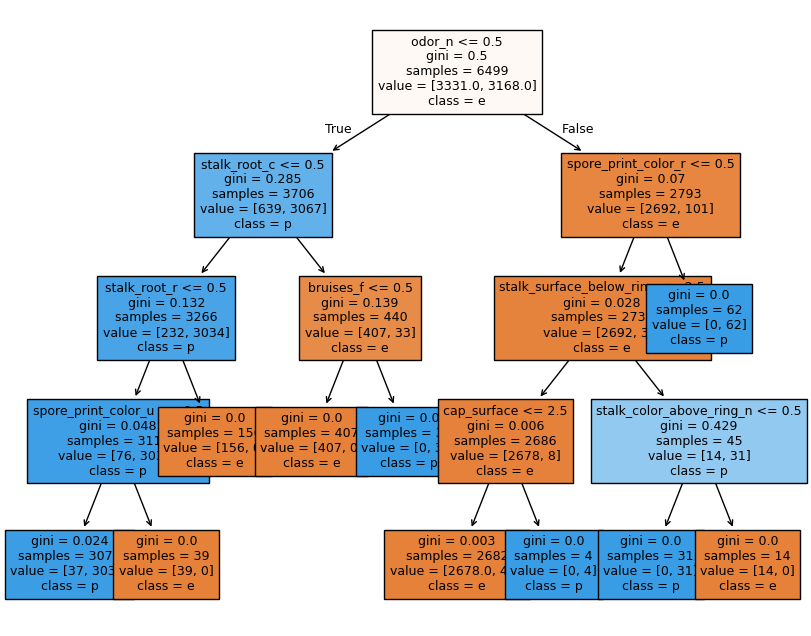

In [21]:
fig, ax = plt.subplots(1,1, figsize = (10, 8))
plot_tree(tree_clf,
          filled = True, fontsize = 9,
          feature_names = new_feature_names, class_names = label_names)

plt.show()

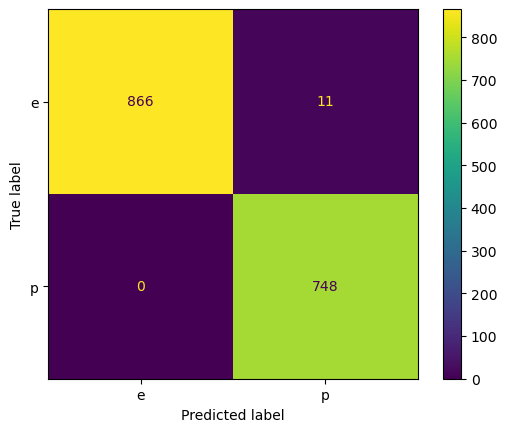

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cfm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cfm, display_labels = label_names).plot()
plt.show()

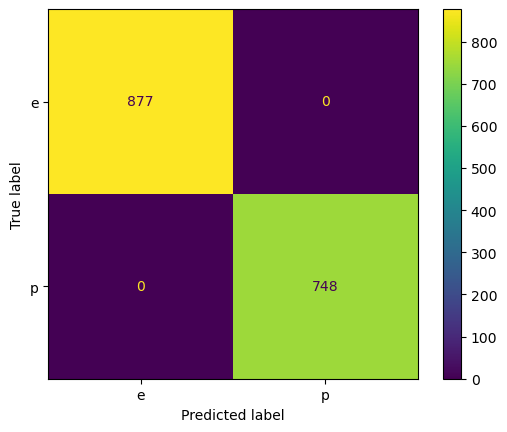

In [23]:
'''LOGISTIC REGRESSION'''

# Train a logistic regression model
model_LogReg = LogisticRegression(penalty = None, max_iter = 10000)
model_LogReg.fit(X_train, y_train)

# Make predictions
y_pred_train = model_LogReg.predict(X_train)
y_pred = model_LogReg.predict(X_test)

# Display the confusion matrix
cfm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cfm, display_labels = label_names).plot()
plt.show()


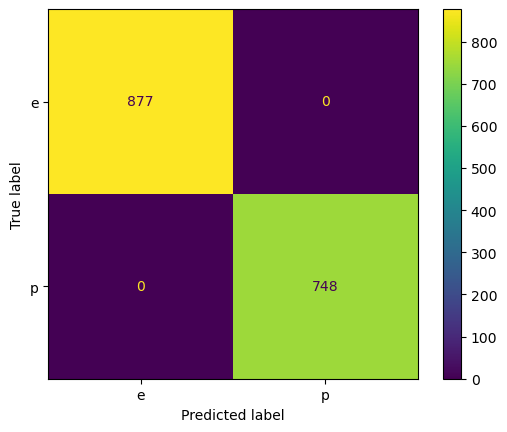

'\nrf.score(X_test, y_test)\n\nfeatures = pd.DataFrame(rf.feature_importances_, index = new_feature_names)\nfeatures.head(10)\n\n'

In [24]:
'''RANDOM FOREST'''
from sklearn.metrics import classification_report


rf = RandomForestClassifier()
rf.fit(X_train, y_train) 

y_pred = rf.predict(X_test)

cfm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(cfm, display_labels = label_names).plot()
plt.show()


'''
rf.score(X_test, y_test)

features = pd.DataFrame(rf.feature_importances_, index = new_feature_names)
features.head(10)

'''

### Problem 1 questions

 - Which model was best?
 - What were the hyper-parameters of this model.
 - What were the accuracy, recall, and precision of the model.
 - Of accuracy, recall, precision, which did you use to decide the best model.

#### Your responses here:

- Which model:  NO
- Hyper-parameters:NO
- Metrics
    - Accuracy: NO
    - Recall: NO
    - Precision: NO
- How did you decide best? NO




## Problem 2

The NFL draft is coming up at the end of April. This is when NFL teams get to select college players to join their team. The draft comprises seven rounds over three days (day 1: round 1, day 2: rounds 2 and 3, day 3: rounds 4, 5, 6, 7) with teams taking turns selecting players. Better players tend to go in earlier rounds.

In this problem, you will try to predict whether defensive players are drafted on Day 1, 2, or 3 based on their performance in the NFL combine (an assay of physical skills).

The data are imported below.

 - Create a target variable for day 1, day 2, day 3 based on the round drafted.
 - Create the most accurate predictor you can using any method or subset of the data you choose. *You may not use round as a feature!*
 - Show the confusion matrix for your model and list the accuracy of your model.

In [52]:
nfl_draft = pd.read_csv('https://raw.githubusercontent.com/eatai/datasets/refs/heads/main/nfl_defensive_draft.csv')
import numpy as np
nfl_draft2 = nfl_draft

nfl_draft2['Day'] = np.where(nfl_draft2['round'] == 1, 1, np.where(nfl_draft2['round'] == 2|3, 2, 3))

nfl_combine_metrics = nfl_draft.drop(columns= ['Unnamed: 0', 'round', 'season', 'name', 'age', 'position','college_conference'])

#Putting in the Day column
nfl_combine_metrics['Day'] = np.where(nfl_draft2['round'] == 1, 1, np.where(nfl_draft2['round'] == 2|3, 2, 3))

#Drop NA values
nfl_combine_metrics2 = nfl_combine_metrics
nfl_combine_metrics2.dropna(inplace = True)

# X and Y values for train test split
y_nfl = nfl_combine_metrics['Day']

X_nfl = nfl_combine_metrics.drop(columns = ['Day'])

X2_nfl = nfl_combine_metrics2.drop(columns = ['Day'])
y2_nfl = nfl_combine_metrics2['Day']




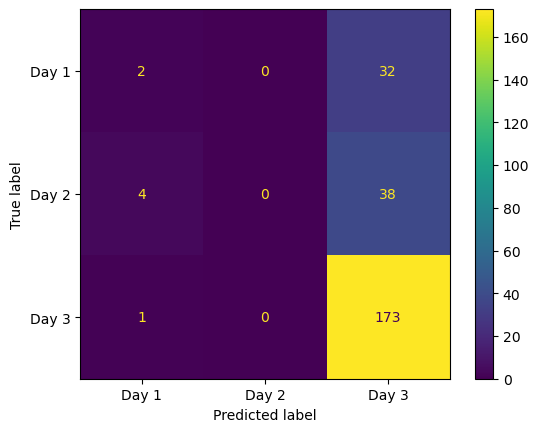

 the accuracy is 0.696


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_nfl, y_nfl, test_size=0.2, random_state=42)



X2_train, X2_test, y2_train, y2_test = train_test_split(X2_nfl, y2_nfl, test_size=0.2, random_state=42)


'''Logistic Regression'''

# Standardize the features
scaler = StandardScaler()
X_nfl_train_scaled = scaler.fit_transform(X_train)
X_nfl_test_scaled = scaler.transform(X_test)

#only for logistic regression
X2_nfl_train_scaled = scaler.fit_transform(X2_train)
X2_nfl_test_scaled = scaler.transform(X2_test)

# Train a logistic regression model
model_Log = LogisticRegression()
model_Log.fit(X2_nfl_train_scaled, y2_train)

# Make predictions
y2_pred_log = model_Log.predict(X2_nfl_test_scaled)

# Display the confusion matrix
cfm = confusion_matrix(y2_test, y2_pred_log)
ConfusionMatrixDisplay(cfm, display_labels = ['Day 1', 'Day 2', 'Day 3']).plot()
plt.show()



#calculate accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_log) 

print(f' the accuracy is {accuracy_score(y_test, y_pred_log)}')


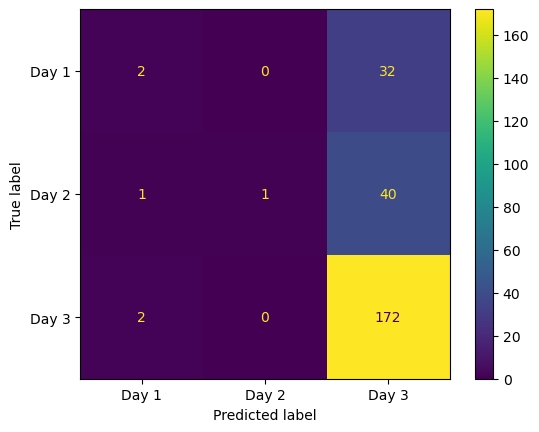

 the accuracy is 0.7


In [54]:
'''Decision Tree'''
tree_nfl= DecisionTreeClassifier(max_depth = 4)    # max_depth = 4
tree_nfl.fit(X_nfl_train_scaled, y_train)  # fit the model

y_pred_tree = tree_nfl.predict(X_nfl_test_scaled) 

cfm = confusion_matrix(y_test, y_pred_tree)
ConfusionMatrixDisplay(cfm, display_labels = ['Day 1', 'Day 2', 'Day 3']).plot()
plt.show()


#calculate accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_tree)
print(f' the accuracy is {accuracy_score(y_test, y_pred_tree)}')


[Text(0.4732142857142857, 0.9, 'forty <= -1.07\ngini = 0.499\nsamples = 1000\nvalue = [149, 184, 667]\nclass = Day 3'),
 Text(0.23214285714285715, 0.7, 'cone <= -0.235\ngini = 0.632\nsamples = 118\nvalue = [37, 25, 56]\nclass = Day 3'),
 Text(0.3526785714285714, 0.8, 'True  '),
 Text(0.14285714285714285, 0.5, 'weight <= -0.07\ngini = 0.651\nsamples = 102\nvalue = [36, 24, 42]\nclass = Day 3'),
 Text(0.07142857142857142, 0.3, 'shuttle <= -2.053\ngini = 0.644\nsamples = 94\nvalue = [30, 22, 42]\nclass = Day 3'),
 Text(0.03571428571428571, 0.1, 'gini = 0.0\nsamples = 4\nvalue = [4, 0, 0]\nclass = Day 1'),
 Text(0.10714285714285714, 0.1, 'gini = 0.639\nsamples = 90\nvalue = [26.0, 22.0, 42.0]\nclass = Day 3'),
 Text(0.21428571428571427, 0.3, 'cone <= -0.454\ngini = 0.375\nsamples = 8\nvalue = [6, 2, 0]\nclass = Day 1'),
 Text(0.17857142857142858, 0.1, 'gini = 0.0\nsamples = 6\nvalue = [6, 0, 0]\nclass = Day 1'),
 Text(0.25, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]\nclass = Day 2'),

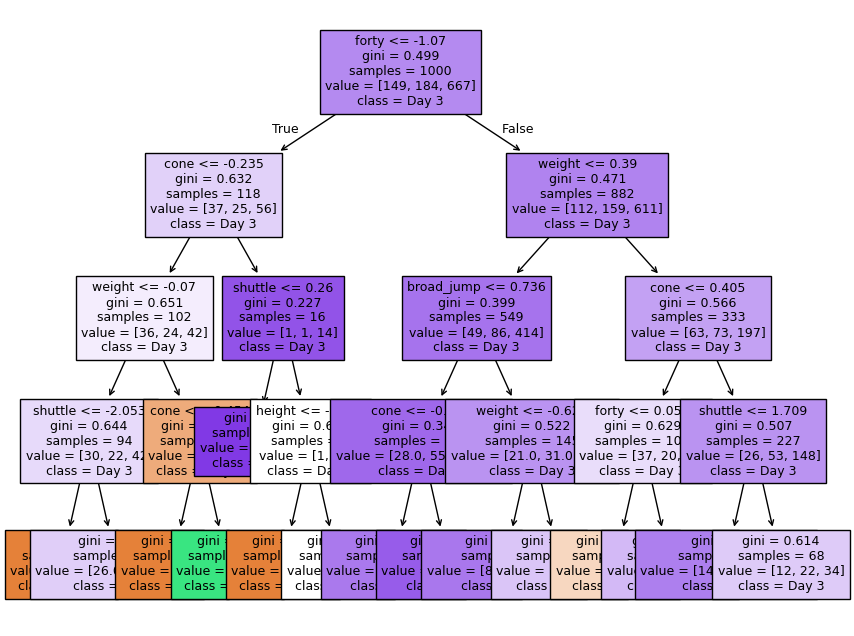

In [55]:
#plot decision tree
fig, ax = plt.subplots(1,1, figsize = (10, 8))
plot_tree(tree_nfl,
          filled = True, fontsize = 9,
          feature_names = X_nfl.columns, class_names = ['Day 1', 'Day 2', 'Day 3'])

 the accuracy is 0.66


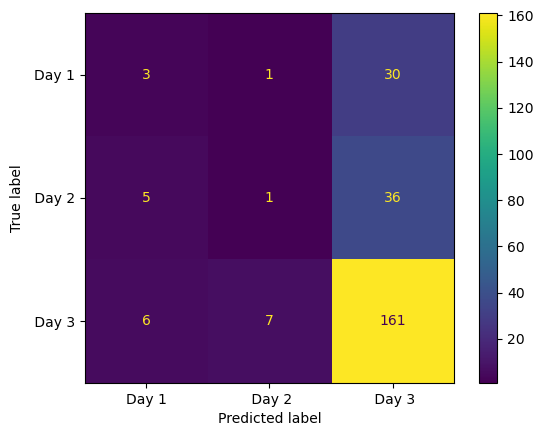

In [56]:
'''Random Forest'''

rf_nfl = RandomForestClassifier()
rf_nfl.fit(X_nfl_train_scaled, y_train)

y_pred_forest = rf_nfl.predict(X_nfl_test_scaled)

tree_cfm_nfl = confusion_matrix(y_test, y_pred_forest)




# features = pd.DataFrame(rf.feature_importances_, index = new_feature_names)
# features.head(10)


ConfusionMatrixDisplay(tree_cfm_nfl, display_labels = ['Day 1', ' Day 2', ' Day 3']).plot()


#calculate accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_forest)

print(f' the accuracy is {accuracy_score(y_test, y_pred_forest)}')

### Problem 2 Questions

 - Which kind of model did you use and why did you choose it?
 Logistic regression because it seems to have best score

 - What was your accuracy?
 Logistic:0.696
 Decision:0.7
 Random:0.66